#$\phi$ distributions caused by only E and B fields
##Standard Settings
**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s} $(Hg)**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Electric field ($E_0$) = $1\,\frac{MV}{m}$**

**Precession time = $100\,s$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

**Particle velocity = $193\,m/s$**

**$\Omega$ = $17$**

**Each point represents the results of 10000 particles.  **

**All particles' motion is ballistic with no gravity  **

**Parallel configurations show by default  **

**Note: A Tsallis factor of 0 could simply mean the automated fit routine did not work.  If it is non-zero it does not necessarily represent the best fit, though I did put in a simple chisquared limit**

In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
colors=['blue','red']
linestyles=['-','--']

histogram = TH1D("phi_hist","phi_hist",100,-5,5)

## Converting to "better units"
* Standard deviation of $\phi$ is (mostly) inversely proportional the $T_2$ time.

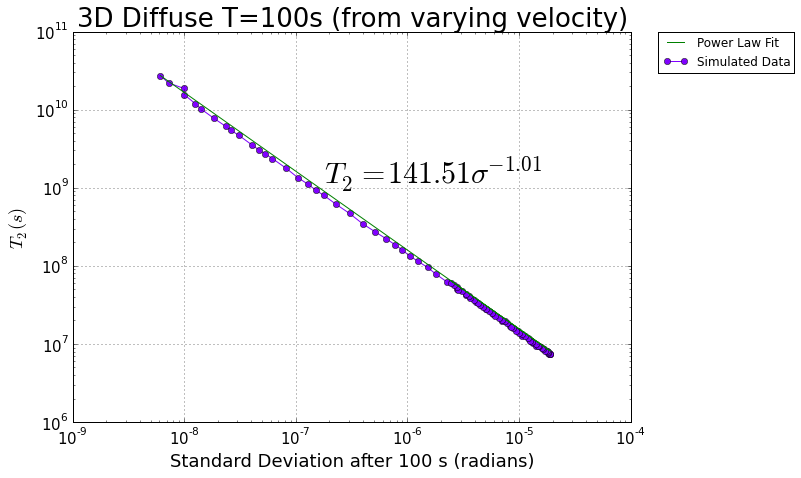

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_var = 'Par_PhiStDev'
y_var = 'Par_SZDetProb'
main_title = '3D Diffuse T=100s (from varying velocity)'
x_axis_title = 'Standard Deviation after 100 s (radians)'
y_axis_title=r"$T_2 (s)$"
lambda_func=[lambda x:x,lambda x:-100/math.log(1-2*x),lambda x:x,lambda x:x]
lines = [range(5586, 5676)]


data=[]
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [x_var,y_var])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func, legend_titles=["Simulated Data"])
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')

log_lambda_func=[lambda x:math.log(x),lambda x:math.log(-100/math.log(1-2*x)),lambda x:x,lambda x:x]
xl,yl = [map(log_lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
coeffs = np.polyfit(xl, yl, 1)
slope=coeffs[0]
# slope = math.log(y[-1]/y[1])/math.log(x[-1]/x[1])
x,y=[map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
xfit = np.array(x)
constant =y[0]*((1./x[0])**slope)
# yl = y[0]*((xl/x[0])**slope)
yfit = constant*(x**slope)

#Plot trendline
plt.plot(xfit, yfit, "green",label="Power Law Fit")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(0.45, 0.61,'$T_2 = %0.2f \sigma^{%0.2f}$' % (constant,slope),transform=ax.transAxes,fontsize=30)

plt.show()
                    

## 2D Monoenergetic
* For the diffuse case, there is a large, resonance in the standard deviation at $\Omega \approx 0.7$.  Specular reflection peaks at $\Omega \approx 1.0$ and rises in the nonadiabatic region.  There are resonances in the nonadiabatic region.

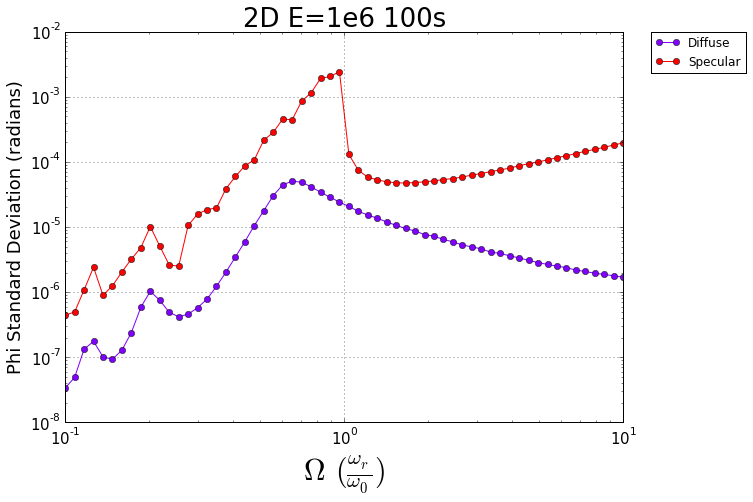

In [3]:
variable = 'MeanVel'
main_title = '2D E=1e6 100s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
legend_titles=["Diffuse","Specular"]
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5884, 5944),range(5944, 6004),]

plot_type="PhiStDev"
y_axis_title="Phi Standard Deviation (radians)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.xlabel(x_axis_title, fontsize=30)
plt.show()
                        



* Only the specular case shows significant skewness at 100s in the nonadiabatic region. Some skewness at 1 s was observed in the diffuse case [not shown]

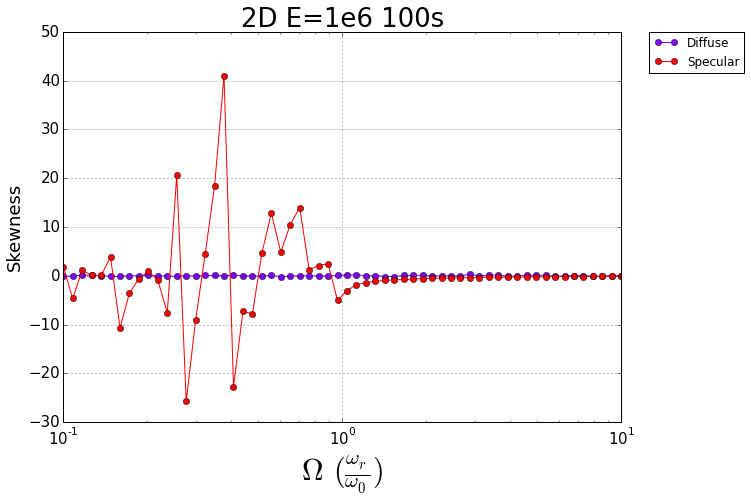

In [4]:
variable = 'MeanVel'
main_title = '2D E=1e6 100s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
legend_titles=["Diffuse","Specular"]
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5884, 5944),range(5944, 6004),]

plot_type="PhiSkewness"
y_axis_title="Skewness"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.xlabel(x_axis_title, fontsize=30)
plt.show()

* We ignore the cases of large skewness in the specular distribution for now.  For the diffuse spectrum, until the extremely nonadiabatic, the kurtosis and the Tsallis fit are constant.  Given that the Tsallis power seems to match 2 exactly, this is highly suggestive.  For the specular case in the nonadiabatic, the spectrum is negatively kurtois.

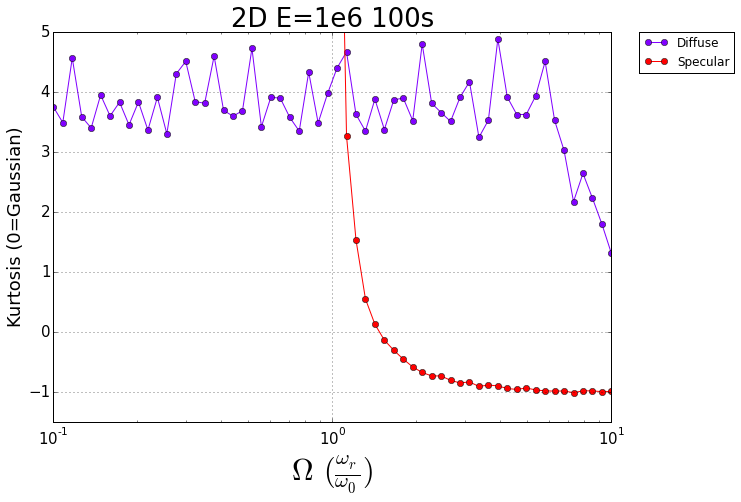

In [5]:
variable = 'MeanVel'
main_title = '2D E=1e6 100s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
legend_titles=["Diffuse","Specular"]
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5884, 5944),range(5944, 6004),]

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.xlabel(x_axis_title, fontsize=30)
plt.show()

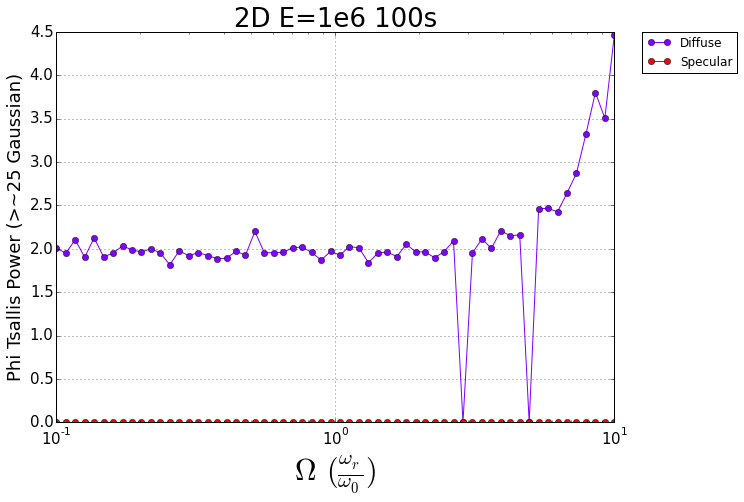

In [6]:
variable = 'MeanVel'
main_title = '2D E=1e6 100s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
legend_titles=["Diffuse","Specular"]
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5884, 5944),range(5944, 6004),]

plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.xlabel(x_axis_title, fontsize=30)
plt.show()

* While I will better illustrate this in the 3D (will fix this later), The distribution shapes are not constant in time.  At one second, there are still significant resonances in the diffuse case and the nonadiabatic region of "gaussianity" extends further.

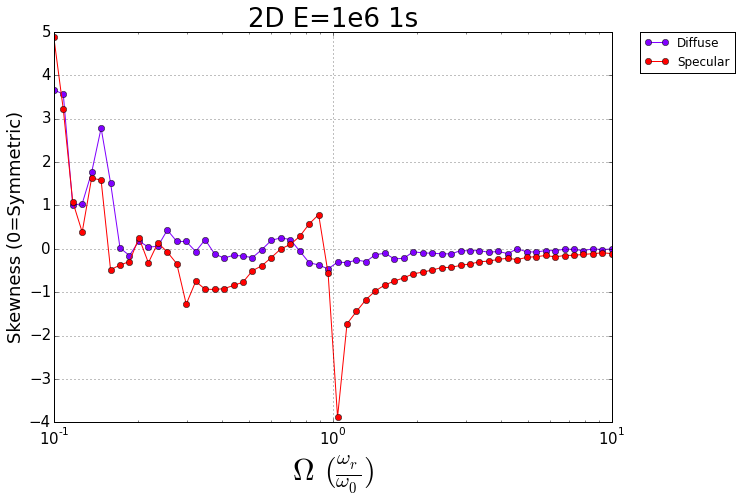

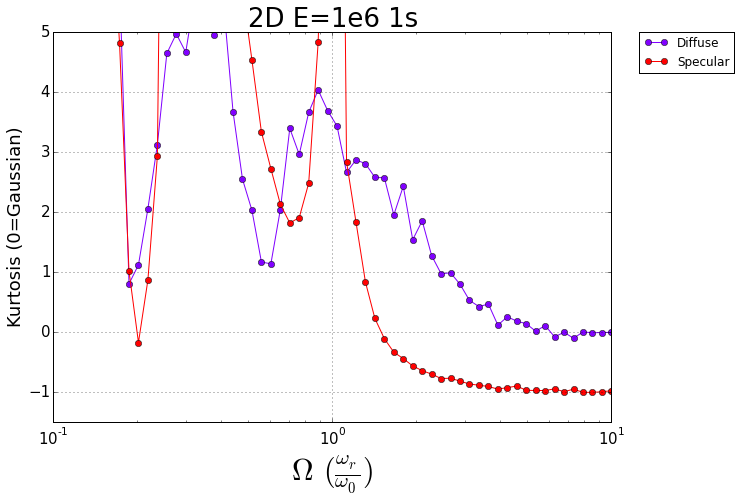

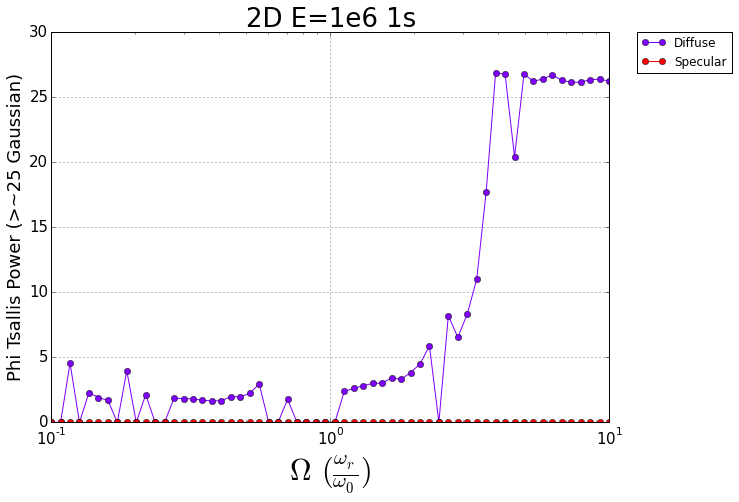

In [3]:
variable = 'MeanVel'
main_title = '2D E=1e6 1s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
legend_titles=["Diffuse","Specular"]
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(6004, 6064),range(6064, 6124)]

plot_type="PhiSkewness"
y_axis_title="Skewness (0=Symmetric)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.xlabel(x_axis_title, fontsize=30)
plt.show()

variable = 'MeanVel'
main_title = '2D E=1e6 1s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
legend_titles=["Diffuse","Specular"]
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(6004, 6064),range(6064, 6124)]

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.xlabel(x_axis_title, fontsize=30)
plt.show()

variable = 'MeanVel'
main_title = '2D E=1e6 1s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
legend_titles=["Diffuse","Specular"]
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(6004, 6064),range(6064, 6124)]

plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=legend_titles,lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.xlabel(x_axis_title, fontsize=30)
plt.show()

## 3D monoenergetic
* Moving to three dimensions, but still monoenergetic, $V_{xy}$ is now sharing with $V_{z}$.  This smooths out some of the adiabatic resonances.  The standard deviation does not scale with $\Omega$ directly as can be seen when other parameters are varied. (The crossing point on the plot is ILL standard running parameters 193 m/s Hg)

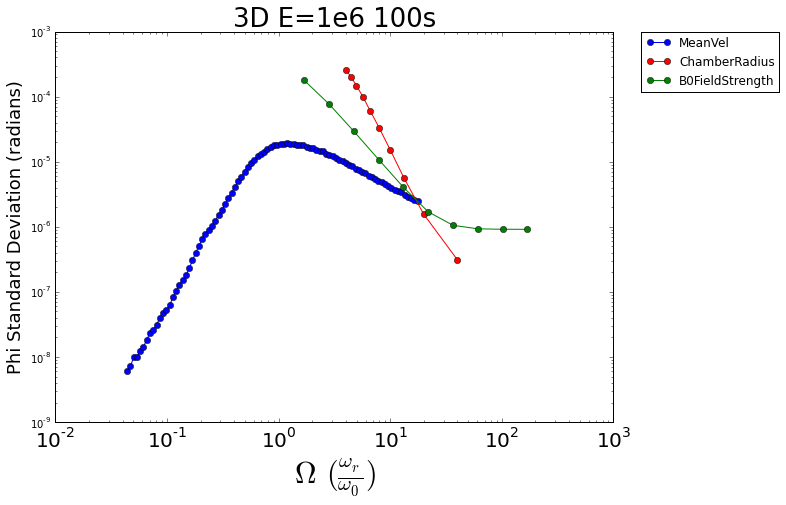

In [8]:
legend_titles=["Vary Vel","Vary Radius",r"Vary $B_{0}$"]
config_type='Par'
plot_type="PhiStDev"

variable = 'MeanVel'
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5586, 5676)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='blue')

variable = 'ChamberRadius'
lambda_func=[lambda x:193/(x*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5520, 5530)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='red')

variable = 'B0FieldStrength'
lambda_func=[lambda x:193/(0.235*4.84578839927e7*x),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5551, 5561)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='green')

main_title = '3D E=1e6 100s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
y_axis_title="Phi Standard Deviation (radians)"
plt.xlabel(x_axis_title, fontsize=30)
plt.ylabel(y_axis_title, fontsize=18)
plt.title(main_title, fontsize=26)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()

* Non $\Omega$ parameters also influence the standard deviation.  The standard deviation depends linearly on the electric field and on the precession time.

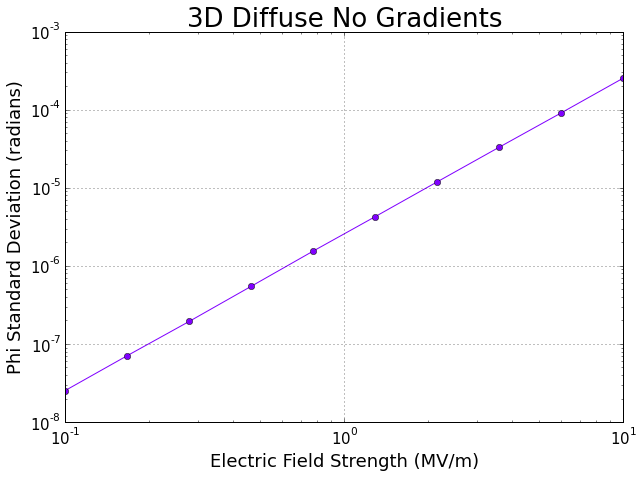

/home/mjbales/work/software/anaconda/lib/python2.7/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


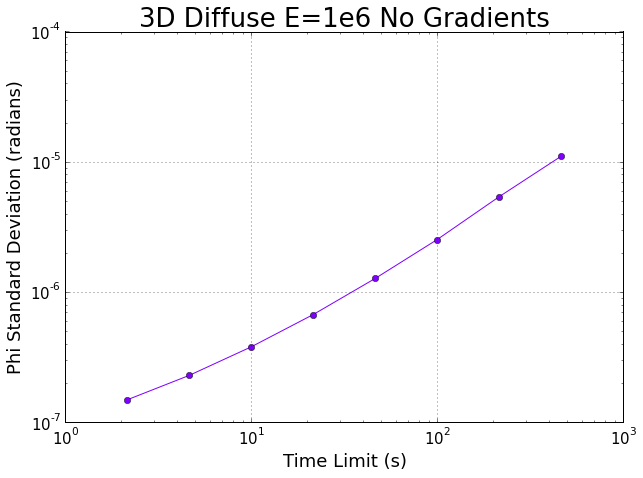

In [9]:
variable = 'E0FieldStrength'
main_title = '3D Diffuse No Gradients'
x_axis_title = r'Electric Field Strength (MV/m)'
lambda_func=[lambda x:x*1e-6,lambda x:x,lambda x:x*1e-6,lambda x:x]
lines = [range(5561, 5571)]
config_type='Par'
plot_type="PhiStDev"
y_axis_title="Phi Standard Deviation (radians)"

data=[]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles,lambda_func=lambda_func)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()

variable = 'TimeLimit'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'Time Limit (s)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5572, 5581)]

config_type='Par'
plot_type="PhiStDev"
y_axis_title="Phi Standard Deviation (radians)"

data=[]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()
                        


* Interesestingly height has a small effect, this is likely due to the amount of times diffuse reflections occur.  This might be part of the reason why the $\Omega$ relationship does not work. 

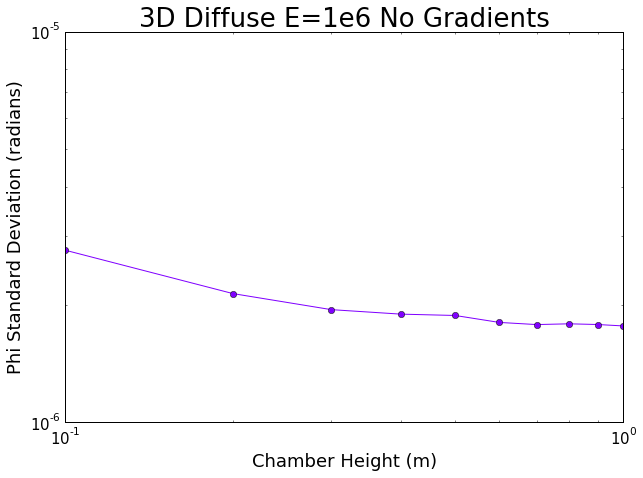

In [10]:
variable = 'ChamberHeight'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = 'Chamber Height (m)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5530, 5540)]
config_type='Par'
plot_type="PhiStDev"
y_axis_title="Phi Standard Deviation (radians)"

data=[]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()
                        


* Of critical importance is that initially distributions are Gaussian and only some time do they approach an equillibriam at a very kurtois, Tsallis like distribution

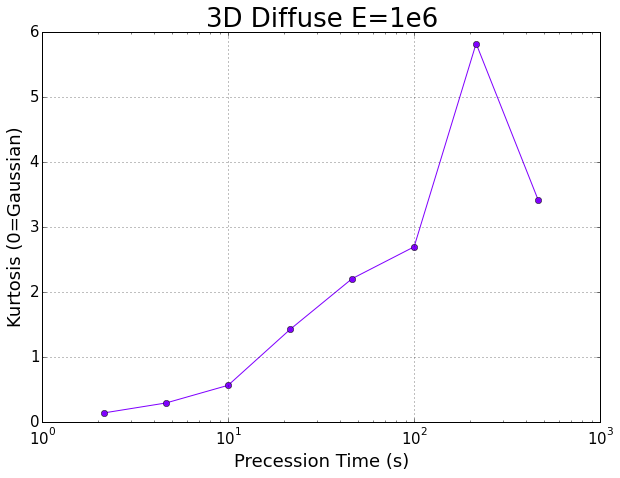

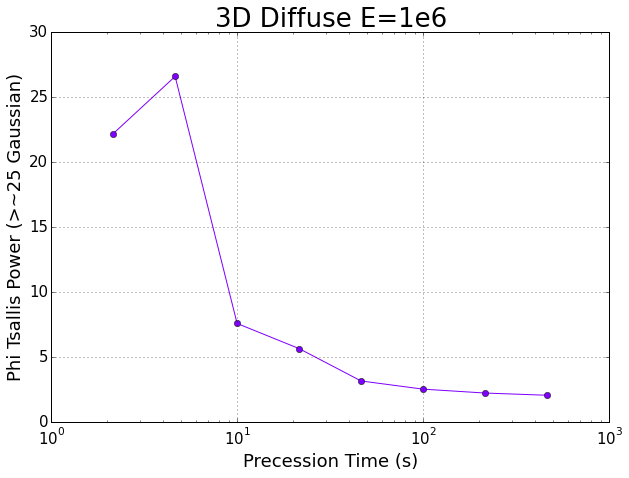

In [11]:
variable = 'TimeLimit'
main_title = '3D Diffuse E=1e6'
x_axis_title = r'Precession Time (s)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5572, 5581)]

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()          


* The $\Omega$ relationship DOES hold up for the shape of the phi distribution.  Again the very non-adiabatic case goes to Gaussian behavior.  For sufficiently adiabatic, the Tsallis power is again 2.  This makes sense if it is a $V_{xy}$ effect since the sharing with $V_{z}$ would only sample more adiabatic regions.  It should be noted here that I chose a default $\Omega$ of 17 which is inconviently on the significantly changing portion of this curve.  This combined with often using 1 second measurements caused significant confusion early on.

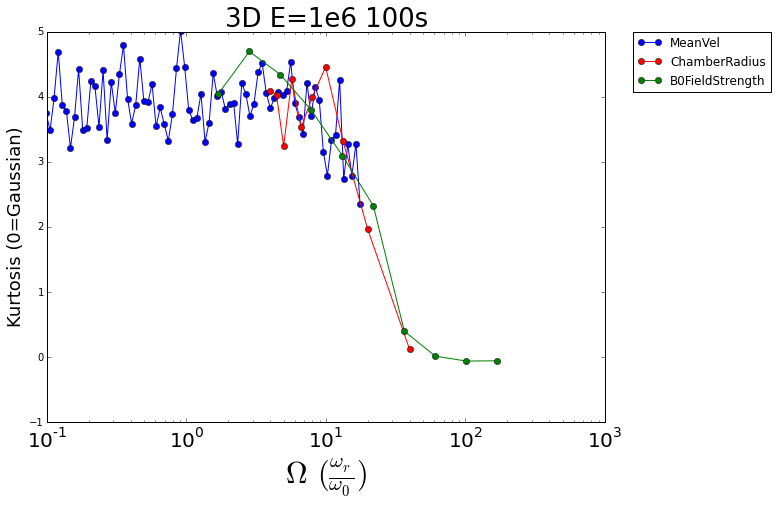

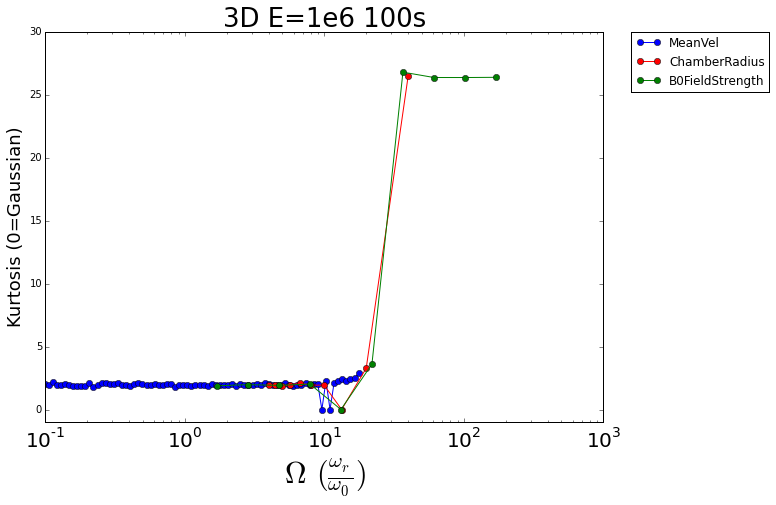

In [12]:
legend_titles=["Vary Vel","Vary Radius",r"Vary $B_{0}$"]
config_type='Par'
plot_type="PhiKurtosis"

variable = 'MeanVel'
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5586, 5676)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='blue')

variable = 'ChamberRadius'
lambda_func=[lambda x:193/(x*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5520, 5530)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='red')

variable = 'B0FieldStrength'
lambda_func=[lambda x:193/(0.235*4.84578839927e7*x),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5551, 5561)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='green')

main_title = '3D E=1e6 100s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
y_axis_title="Kurtosis (0=Gaussian)"
plt.xlabel(x_axis_title, fontsize=30)
plt.ylabel(y_axis_title, fontsize=18)
plt.title(main_title, fontsize=26)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.yscale('log', noncvposy='clip')
plt.axis([ 0.1, 1000 , -1,5])
plt.xscale('log', noncvposy='clip')
plt.show()

legend_titles=["Vary Vel","Vary Radius",r"Vary $B_{0}$"]
config_type='Par'
plot_type="PhiTsallisPower"

variable = 'MeanVel'
lambda_func=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5586, 5676)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='blue')

variable = 'ChamberRadius'
lambda_func=[lambda x:193/(x*4.84578839927e7*1e-6),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5520, 5530)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='red')

variable = 'B0FieldStrength'
lambda_func=[lambda x:193/(0.235*4.84578839927e7*x),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5551, 5561)]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
x, y = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))]
plt.errorbar(x, y, marker='o',label = variable,c='green')

main_title = '3D E=1e6 100s'
x_axis_title = r'$\Omega\,(\frac{\omega_r}{\omega_0})$'
y_axis_title=r"Phi Tsallis Power (Gaussian=\infty)"
plt.xlabel(x_axis_title, fontsize=30)
plt.ylabel(y_axis_title, fontsize=18)
plt.title(main_title, fontsize=26)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.yscale('log', noncvposy='clip')
plt.axis([ 0.1, 1000 , -1,30])
plt.xscale('log', noncvposy='clip')
plt.show()

* In the shape, there is again a relationship with the chamber height in a similar way.  It would be interesting to run this at a lower $\Omega$.

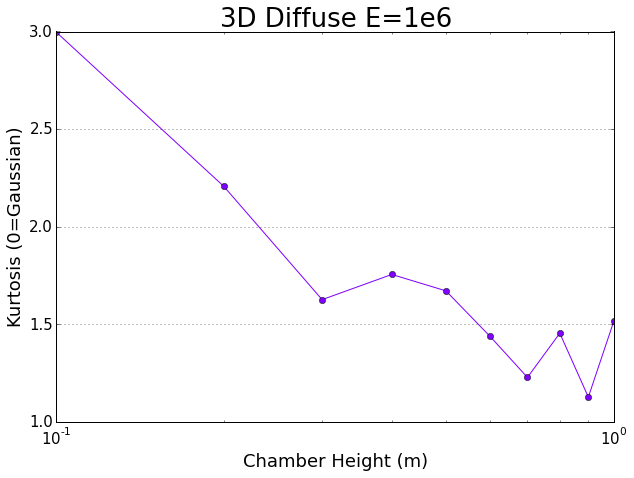

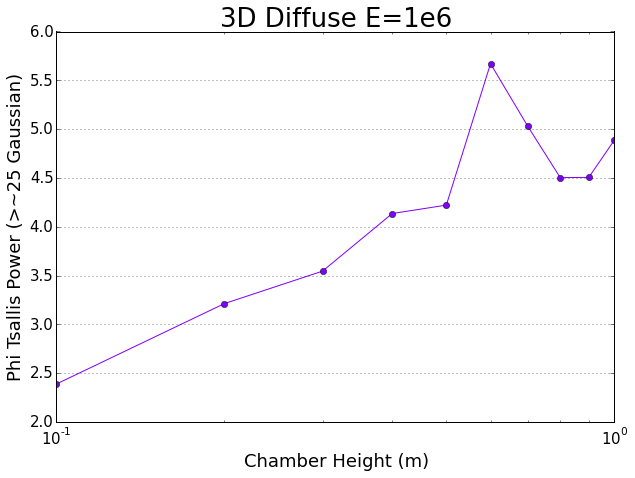

In [13]:
variable = 'ChamberHeight'
main_title = '3D Diffuse E=1e6'
x_axis_title = r'Chamber Height (m)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5530, 5540)]

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()     

* Electric field strength does not affect the shape (it does need to exist though)

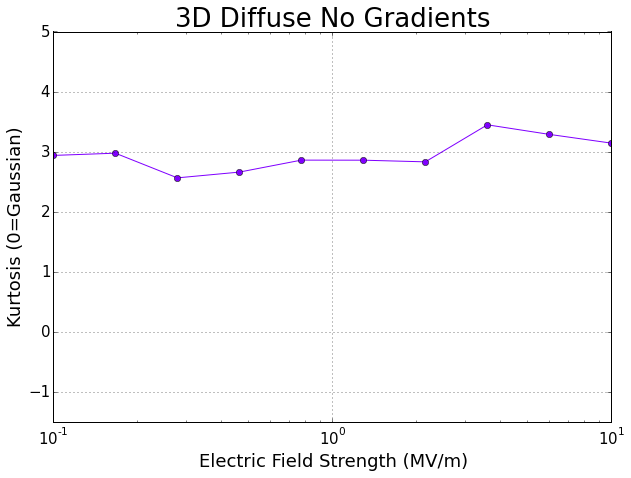

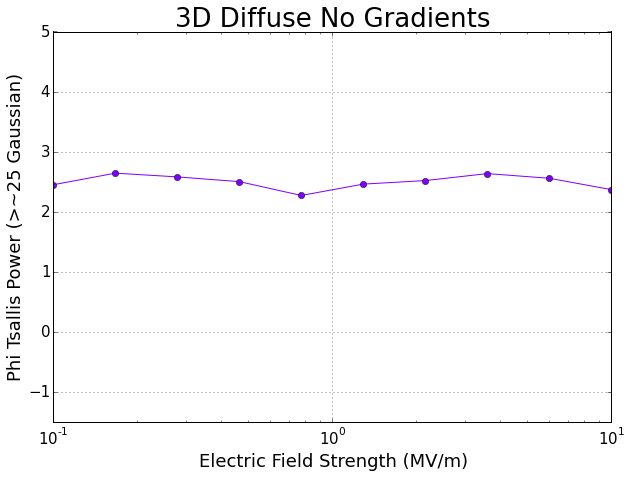

In [14]:
variable = 'E0FieldStrength'
main_title = '3D Diffuse No Gradients'
x_axis_title = r'Electric Field Strength (MV/m)'
lambda_func=[lambda x:x*1e-6,lambda x:x,lambda x:x*1e-6,lambda x:x]
lines = [range(5561, 5571)]

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()     

* Diffuse reflection probability does affect the shape of the distribution significantly (though again, not the size).  The relationship appears nearly directly linear in terms of kurtosis. Could you detect how diffuse your chamber is with this?

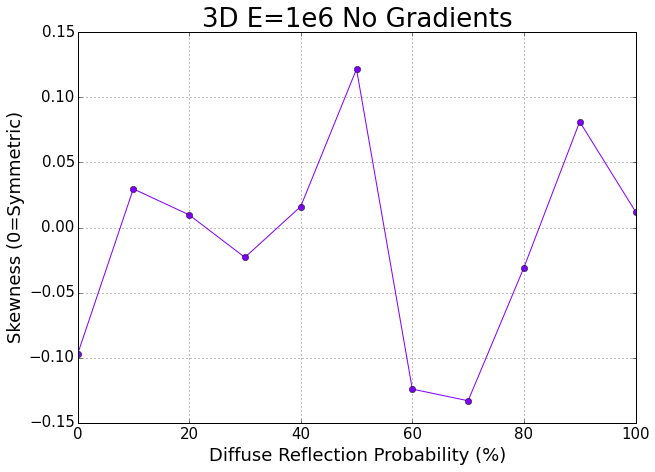

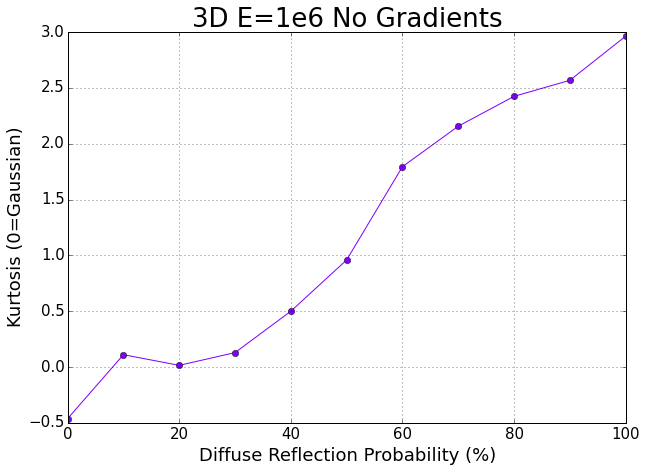

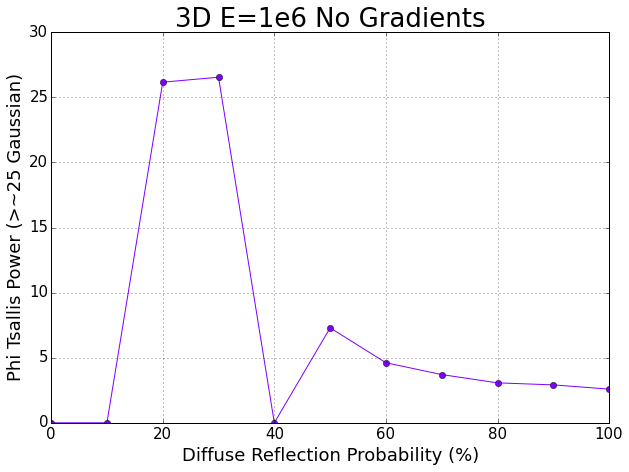

In [4]:
variable = 'DiffuseReflectionProb'
main_title = '3D E=1e6 No Gradients'
x_axis_title = 'Diffuse Reflection Probability (%)'
lambda_func=[lambda x:x*100,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5540, 5551)]

plot_type="PhiSkewness"
y_axis_title="Skewness (0=Symmetric)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
data=[]
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()     

## 3D Maxwell-Boltzmann distribution
* Now we take an energy profile consistent with the Maxwell-Boltzmann distribution and vary the temperature of our gas.  We expect this to be directly sampling the previous results we saw.  We can see that the Tsallis/kurtois feature is still present but no significant shape in the standard deviation remains though there is a linear dependence with temperature.

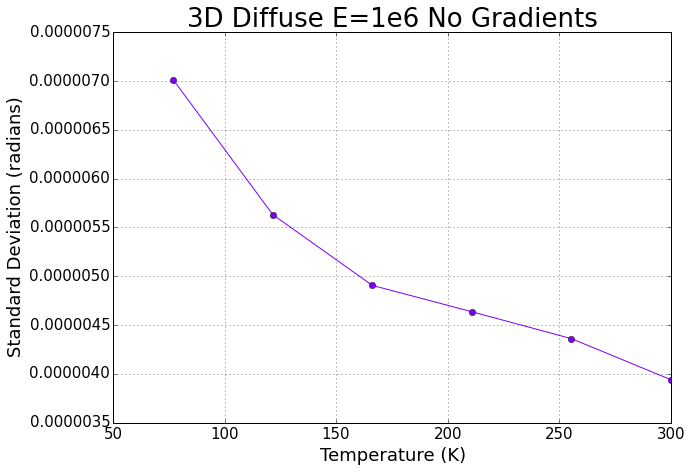

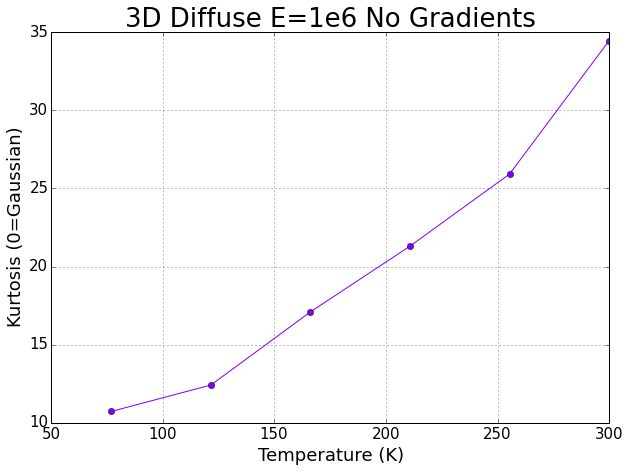

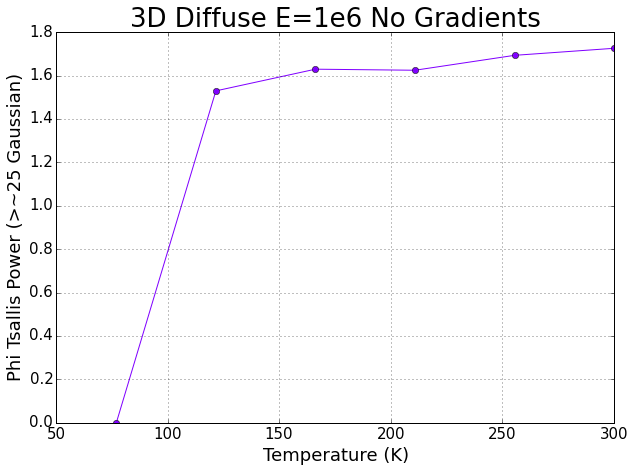

In [16]:
variable = 'VelProfHistPath'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = r'Temperature (K)'
lambda_func=[lambda x:float(x[1:]),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5842, 5848)]

plot_type="PhiStDev"
y_axis_title="Standard Deviation (radians)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()     

#$\phi$ distributions caused by linear B gradients

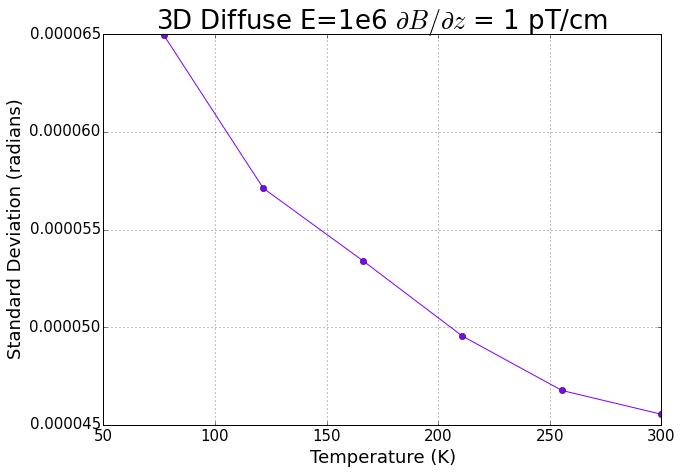

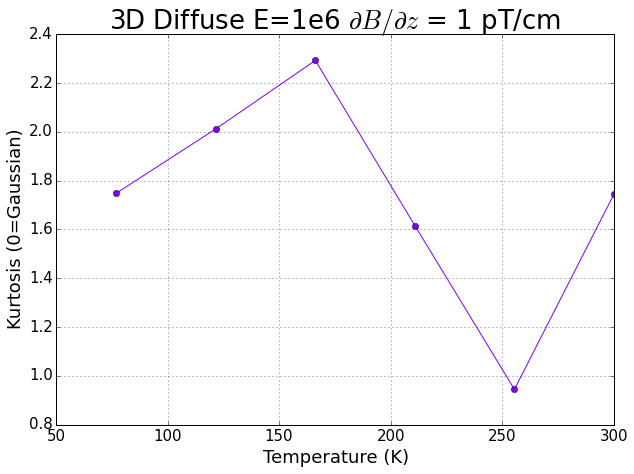

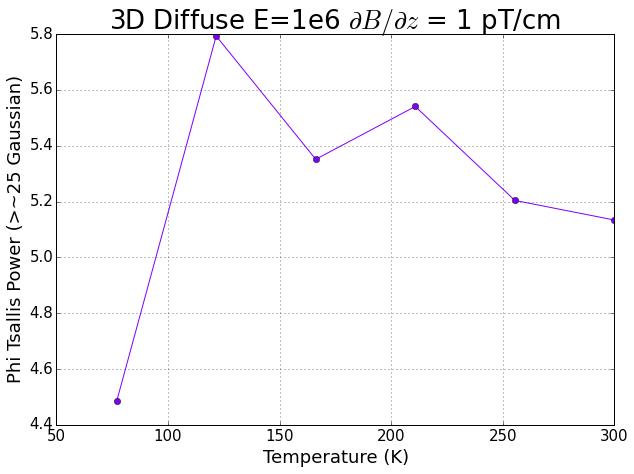

In [17]:
variable = 'VelProfHistPath'
main_title = r'3D Diffuse E=1e6 $\partial B / \partial z$ = 1 pT/cm'
x_axis_title = r'Temperature (K)'
lambda_func=[lambda x:float(x[1:]),lambda x:x,lambda x:x,lambda x:x]
lines = [range(5848, 5854)]

plot_type="PhiStDev"
y_axis_title="Standard Deviation (radians)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
# plt.xscale('log', noncvposy='clip')
plt.show()     

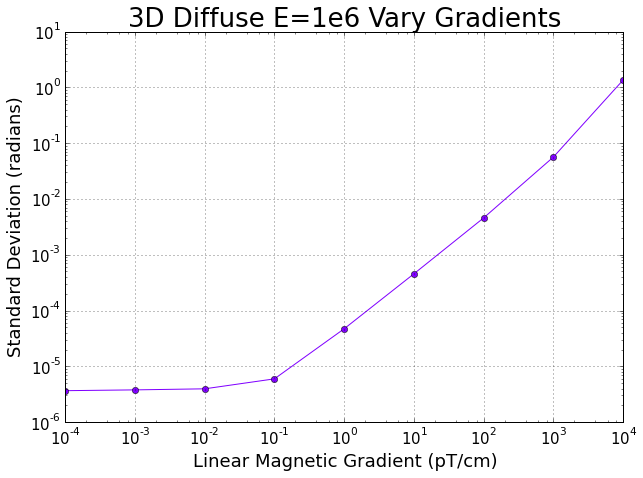

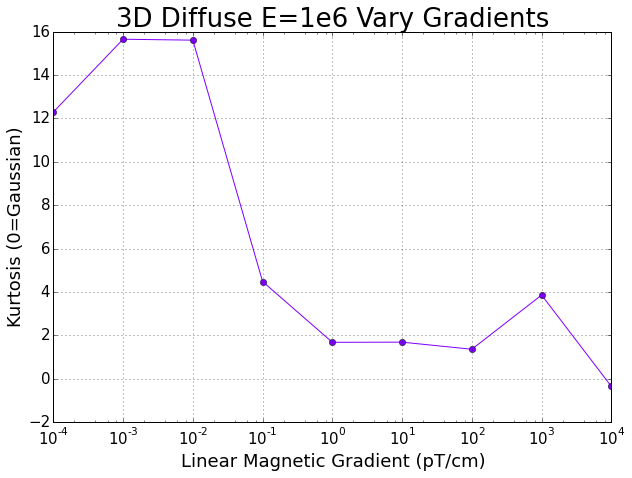

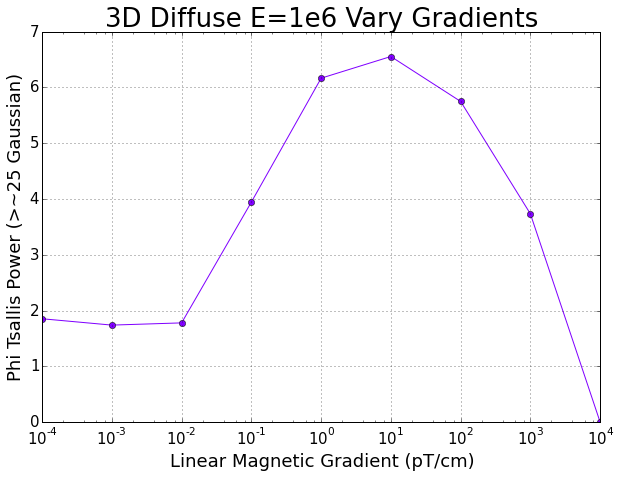

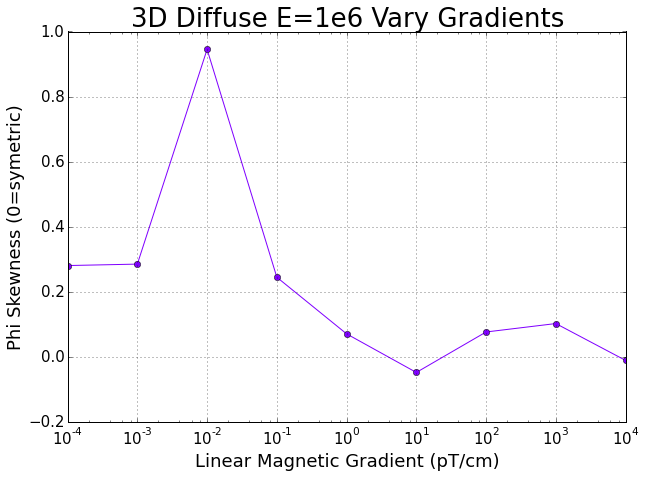

In [3]:
variable = 'BGradFieldStrength'
main_title = '3D Diffuse E=1e6 Vary Gradients'
x_axis_title = r'Linear Magnetic Gradient (pT/cm)'
lambda_func=[lambda x:x/1e-10,lambda x:x,lambda x:x,lambda x:x]
lines = [range(5854, 5863)]

plot_type="PhiStDev"
y_axis_title="Standard Deviation (radians)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()     

plot_type="PhiSkewness"
y_axis_title="Phi Skewness (0=symetric)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()   

#$\phi$ distributions caused by E gradients
* E Gradients act strangely.  

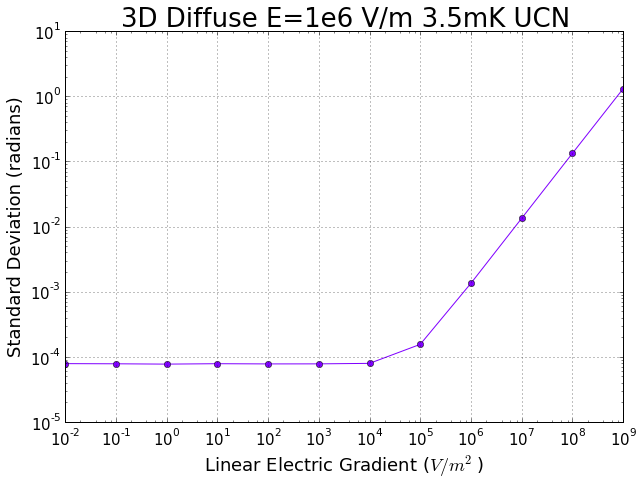

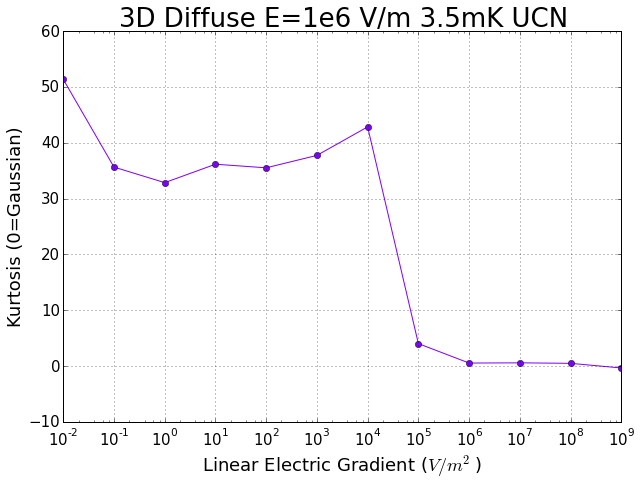

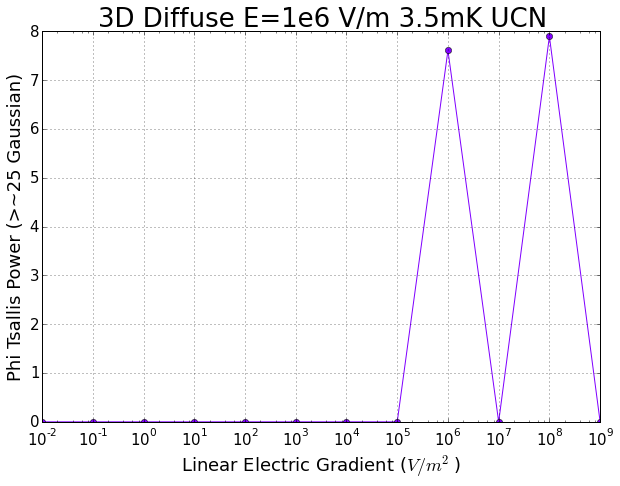

In [8]:
variable = 'EGradFieldStrength'
main_title = '3D Diffuse E=1e6 V/m 3.5mK UCN'
x_axis_title = r'Linear Electric Gradient ($V/m^2$)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
lines = [range(6185, 6197)]

plot_type="PhiStDev"
y_axis_title="Standard Deviation (radians)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()

plot_type="PhiKurtosis"
y_axis_title="Kurtosis (0=Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
#plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()


plot_type="PhiTsallisPower"
y_axis_title="Phi Tsallis Power (>~25 Gaussian)"
config_type='Par'
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
data = srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
srkgraphics.make_plot_from_data(data, titles=titles, lambda_func=lambda_func)
# plt.yscale('log', noncvposy='clip')
# plt.axis([ 0.1, 10 , -1.5,5])
plt.xscale('log', noncvposy='clip')
plt.show()     

OK        


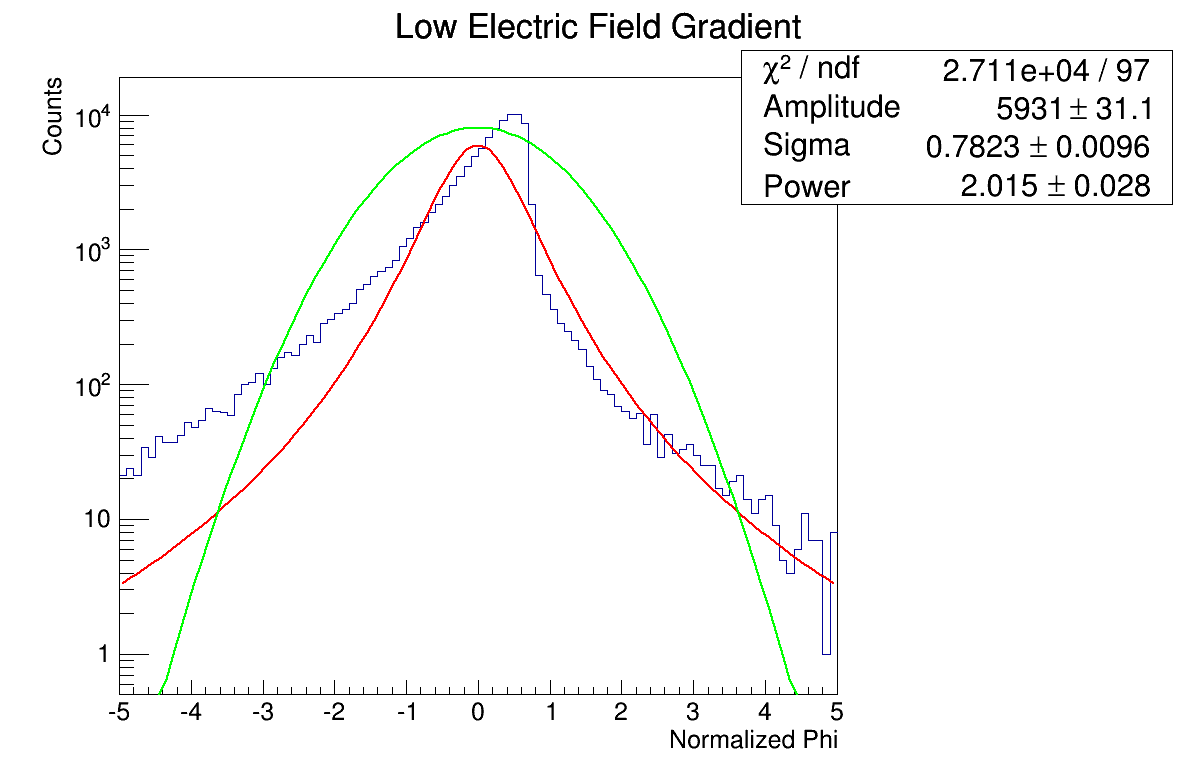

In [11]:
c1.Clear()
rid=6185
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)

drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Low Electric Field Gradient;Normalized Phi;Counts")
histogram.Draw()
phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin, stdev,2)
histogram.Fit("phiTsallisFunc","M")
if ROOT.gMinuit.fCstatu == "CONVERGED ":
    print "YAY!!!"
print ROOT.gMinuit.fCstatu
# phiTsallisFunc.Draw("same")
gaus = TF1("gaus","8000*TMath::Gaus(x,0,1)",-5,5)
gaus.SetLineColor(ROOT.kGreen)
gaus.Draw("same")
c1.SetLogy()
c1


OK        


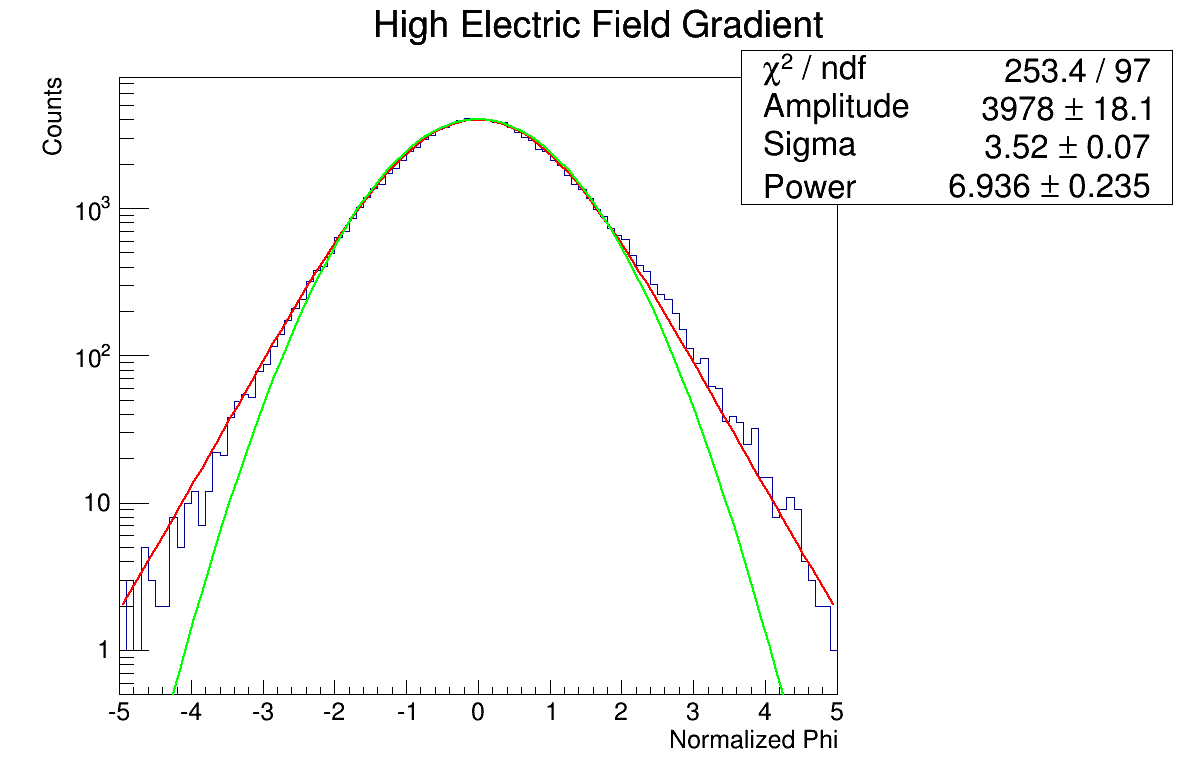

In [14]:
c1.Clear()
rid=6196
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)

drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("High Electric Field Gradient;Normalized Phi;Counts")
histogram.Draw()
phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin, stdev,2)
histogram.Fit("phiTsallisFunc","M")
if ROOT.gMinuit.fCstatu == "CONVERGED ":
    print "YAY!!!"
print ROOT.gMinuit.fCstatu
# phiTsallisFunc.Draw("same")
gaus = TF1("gaus","4000*TMath::Gaus(x,0,1)",-5,5)
gaus.SetLineColor(ROOT.kGreen)
gaus.Draw("same")
c1.SetLogy()
c1
